Notes. The answer is unique, but the solution is not. My code below isn't the optimal solution, and its purpose is to help you understand how a M/M/1 queueing system works.

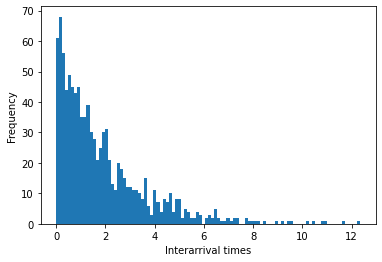

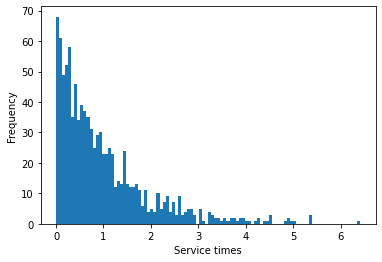

The average time in queue: 0.9522570225528777
The average time being serviced: 0.9792943282687459
The average time in system: 1.9315513508216235


In [2]:
# -*- coding:utf-8 -*-
# __author__ : Xiaoyan Liu, ID number: 201931051095
# __date__: 2022/11/19 19:00

import math
from math import pi
import matplotlib.pyplot as plt
import numpy as np


# [Part1.] Use the linear congruential generator to generate the U(0,1)
a = 16807
c = 0
m = 2147483647
II = 1155192169
SS = 1806794933
n = 0

Mean_interarrival = 2
Mean_service = 1
Ilist = []
Slist = []

while n <= 999:
    II = (a * II + c) % m
    IU = II/m
    I = - Mean_interarrival * math.log(IU)
    
    SS = (a * SS + c) % m
    SU = SS/m
    S = - Mean_service * math.log(SU)
    
    Ilist.append(I)
    Slist.append(S)
    n = n+1

plt.hist(Ilist,bins=100)
plt.xlabel("Interarrival times")
plt.ylabel("Frequency")
plt.show()

plt.hist(Slist,bins=100)
plt.xlabel("Service times")
plt.ylabel("Frequency")
plt.show()


# [Part2.] M/M/1队列：具有指数达到间隔时间、服务时间和先入先出排队规则的单服务台排队系统
# 第i位顾客到达的时间(绝对)：T(i)=I(1)+...+I(i-1)+I(i)
# 第i位顾客在队列中的时间(相对)：D(i)
# 第i位顾客在系统中的时间(相对)：X(i)=D(i)+S(i)
# 第i位顾客离去的时间(绝对)：L(i)=T(i)+X(i)

n = 0
T = 0
L = 0

Tlist = []
Dlist = []
Xlist = []
Llist = []

# 顾客按顺序依次考虑
while n <= 999:
    T = T+Ilist[n]
    
    if T<=L:
        D = L-T
        X = D+Slist[n]
        L = T+X
        
    if T>L:
        D = 0
        X = D+Slist[n]
        L = T+X

    Tlist.append(T)
    Dlist.append(D)
    Xlist.append(X)
    Llist.append(L)
    n = n+1


# [Part3.] Calculate and output results
ED = np.mean(Dlist)
ES = np.mean(Slist)
EX = np.mean(Xlist)

print('The average time in queue:',ED)
print('The average time being serviced:',ES)
print('The average time in system:',EX)

In [ ]:
reset